In [138]:
from matplotlib import pyplot as plt
import numpy as np
import os
import random
import time

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# import a lot of things from keras:
# sequential model
from keras.models import Sequential

# layers
from keras.layers import Input, Dense, LSTM

# loss function
from keras.metrics import categorical_crossentropy

# callback functions
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# convert data to categorial vector representation
from keras.utils import to_categorical

# nice progress bar for loading data
from tqdm.notebook import tqdm

# helper function for train/test split
from sklearn.model_selection import train_test_split

# import confusion matrix helper function
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# resample signal to n samples
from scipy.signal import resample

# XML parser
import xml.etree.ElementTree as ET

# encoding and normalizing data
from sklearn.preprocessing import LabelEncoder, StandardScaler

NUM_POINTS = 50

In [139]:
data = []
target_dir = os.path.join('dataset', 'xml_logs')

for root, subdirs, files in os.walk(target_dir):
    if 'ipynb_checkpoint' in root:
        continue
    
    if len(files) > 0:
        for f in tqdm(files):
            if '.xml' in f:
                fname = f.split('.')[0]
                label = fname[:-2]
                
                xml_root = ET.parse(f'{root}/{f}').getroot()
                
                points = []
                for element in xml_root.findall('Point'):
                    x = element.get('X')
                    y = element.get('Y')
                    points.append([x, y])
                    
                points = np.array(points, dtype=float)
                
                scaler = StandardScaler()
                points = scaler.fit_transform(points)
                
                resampled = resample(points, NUM_POINTS)
                
                data.append((label, resampled))

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/91 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
print(data[0])

('arrow', array([[-1.98115675,  1.98053787],
       [-2.06546475,  1.99436522],
       [-1.93086964,  1.8442288 ],
       [-1.90192736,  1.76971743],
       [-1.78875077,  1.71317545],
       [-1.71781591,  1.57516255],
       [-1.57514812,  1.43563976],
       [-1.58042064,  1.39580667],
       [-1.34995696,  1.18830922],
       [-1.19546419,  0.99642441],
       [-0.960359  ,  0.83813815],
       [-0.78288021,  0.61858763],
       [-0.52384061,  0.46002859],
       [-0.32284315,  0.28639652],
       [-0.08225056,  0.0972638 ],
       [ 0.13539409, -0.04098562],
       [ 0.28665714, -0.18479149],
       [ 0.38552463, -0.22181367],
       [ 0.54906291, -0.37553448],
       [ 0.62910992, -0.43764128],
       [ 0.77023395, -0.53465178],
       [ 0.81775568, -0.56226704],
       [ 0.89772108, -0.61428591],
       [ 0.7960657 , -0.65419655],
       [ 0.7157478 , -0.69746153],
       [ 0.5429837 , -0.65135589],
       [ 0.34374538, -0.64974188],
       [ 0.22664267, -0.6529458 ],
       [ 0

## Let's have a look at our data

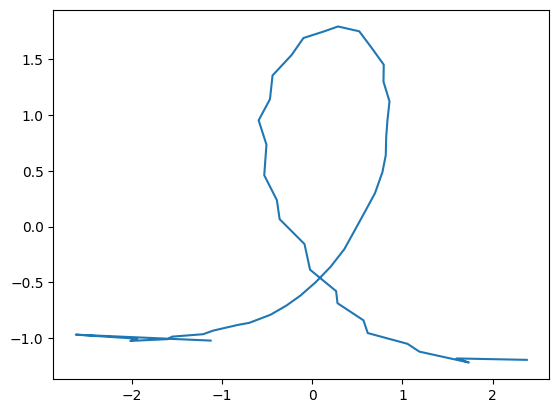

In [ ]:
test_data = random.sample(data, 1)[0]

label = test_data[0]
sequence = test_data[1]
sequence

plt.plot(sequence.T[0], sequence.T[1]*-1)

In [ ]:
# Prepare the data
labels = [sample[0] for sample in data]

print(set(labels))
print("all la")
print(labels)

encoder = LabelEncoder()
labels_encoded = encoder.fit_transform(labels)



y = to_categorical(labels_encoded)

print(len(y[0]))

sequences = [sample[1] for sample in data]
X = np.array(sequences)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

{'triangle', 'caret', 'circle', 'left_sq_bracket', 'rectangle', 'arrow', 'left_curly_brace', 'right_curly_brace', 'star', 'right_sq_bracket', 'pigtail', 'v', 'x', 'check', 'question_mark', 'delete_mark'}
all la
['arrow', 'arrow', 'arrow', 'arrow', 'arrow', 'arrow', 'arrow', 'arrow', 'arrow', 'arrow', 'caret', 'caret', 'caret', 'caret', 'caret', 'caret', 'caret', 'caret', 'caret', 'caret', 'check', 'check', 'check', 'check', 'check', 'check', 'check', 'check', 'check', 'check', 'circle', 'circle', 'circle', 'circle', 'circle', 'circle', 'circle', 'circle', 'circle', 'circle', 'delete_mark', 'delete_mark', 'delete_mark', 'delete_mark', 'delete_mark', 'delete_mark', 'delete_mark', 'delete_mark', 'delete_mark', 'delete_mark', 'left_curly_brace', 'left_curly_brace', 'left_curly_brace', 'left_curly_brace', 'left_curly_brace', 'left_curly_brace', 'left_curly_brace', 'left_curly_brace', 'left_curly_brace', 'left_curly_brace', 'left_sq_bracket', 'left_sq_bracket', 'left_sq_bracket', 'left_sq_br

In [ ]:

def model_builder(lstm_parameter):
    # Define the model
    model = Sequential()

    # add LSTM layer
    # input shape is (length of an individual sample, dimensions of the sample)
    # in our case: two dimensions, as we have X and Y coordinates

    # old syntax
    #model.add(LSTM(64, input_shape=(NUM_POINTS, 2)))

    # new syntax
    model.add(Input((NUM_POINTS, 2)))
    model.add(LSTM(lstm_parameter))

    # add dense layer to do machine learning magic
    model.add(Dense(32, activation='relu'))

    # here, you can add more layers and maybe a dropout for better performance

    # softmax layer for classification
    model.add(Dense(len(set(labels)), activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)
stop_early = EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
def train_model(model):
    # Train the model
    history = model.fit(
        X_train,
        y_train,
        epochs=10,
        batch_size=32,
        validation_data=(X_test, y_test),
        verbose=1,
        callbacks=[reduce_lr, stop_early]
    )
    return history

In [ ]:
def show_training_results(model, history):
    
    #Trainigns advancement
    model.summary()
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    fig = plt.figure(figsize=(15, 7))
    ax = plt.gca()

    ax.set_xlabel('Epoch')
    ax.set_ylabel('Accuracy (Line), Loss (Dashes)')

    ax.axhline(1, color='gray')

    plt.plot(accuracy, color='blue')
    plt.plot(val_accuracy, color='orange')
    plt.plot(loss, '--', color='blue', alpha=0.5)
    plt.plot(val_loss, '--', color='orange', alpha=0.5)
    


    #Confusion Matrix    
    # let the model make predictions for our training data
    y_predictions = model.predict(X_test)

    # to build a confusion matrix, we have to convert it to classifications
    # this can be done by using the argmax() function to set the probability to 1 and the rest to 0
    y_predictions = np.argmax(y_predictions, axis=1)

    y_test_labels = np.argmax(y_test, axis=1)

    # create and plot confusion matrix
    conf_matrix = confusion_matrix(y_test_labels, y_predictions)

    fig = plt.figure(figsize=(10, 10))

    ConfusionMatrixDisplay(conf_matrix, display_labels=set(labels)).plot(ax=plt.gca())

    plt.xticks(rotation=90, ha='center')
    pass

In [ ]:
#load validation data

val_data = []
target_dir = os.path.join('dataset', 'dataset')

for root, subdirs, files in os.walk(target_dir):
    if 'ipynb_checkpoint' in root:
        continue
    
    if len(files) > 0:
        for f in tqdm(files):
            if '.xml' in f:
                fname = f.split('.')[0]
                label = fname[:-2]
                
                xml_root = ET.parse(f'{root}/{f}').getroot()
                
                points = []
                for element in xml_root.findall('Point'):
                    x = element.get('X')
                    y = element.get('Y')
                    points.append([x, y])
                    
                points = np.array(points, dtype=float)
                
                scaler = StandardScaler()
                points = scaler.fit_transform(points)
                
                resampled = resample(points, NUM_POINTS)
                
                val_data.append((label, resampled))
                
                
# Prepare the data
val_labels = [sample[0] for sample in val_data]



encoder = LabelEncoder()
val_labels_encoded = encoder.fit_transform(val_labels)

print(set(val_labels_encoded))

val_y = to_categorical(val_labels_encoded)

print(len(val_y[0]))

sequences = [sample[1] for sample in val_data]
val_X = np.array(sequences)

  0%|          | 0/161 [00:00<?, ?it/s]

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}
16


In [ ]:
#Evaluate the model
def evaluate_model(model):
    #matrix
    # let the model make predictions for our training data
    start_time = time.time()
    y_predictions = model.predict(val_X)
    elapsed_time = time.time() - start_time
    mean_time = elapsed_time / len(val_X)
    
    
    #print("y_predictions ")
    print(y_predictions )
    # to build a confusion matrix, we have to convert it to classifications
    # this can be done by using the argmax() function to set the probability to 1 and the rest to 0
    y_predictions = np.argmax(y_predictions, axis=1)

    # create and plot confusion matrix
    val_y_labels = np.argmax(val_y, axis=1)
    
    
    print("val:val_y_labels")
    print(val_y_labels)
    conf_matrix = confusion_matrix(val_y_labels, y_predictions)

    fig = plt.figure(figsize=(10, 10))
    ConfusionMatrixDisplay(conf_matrix, display_labels=set(labels)).plot(ax=plt.gca())
    plt.xticks(rotation=90, ha='center')
    val_loss, val_accuracy = model.evaluate(val_X, val_y, verbose=0)
    return  val_loss, val_accuracy, mean_time, elapsed_time

# Lstm_Parameter 64

Epoch 1/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.3399 - loss: 2.1483 - val_accuracy: 0.8990 - val_loss: 0.3926 - learning_rate: 0.0010
Epoch 2/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9229 - loss: 0.3050 - val_accuracy: 0.9806 - val_loss: 0.0910 - learning_rate: 0.0010
Epoch 3/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9728 - loss: 0.1172 - val_accuracy: 0.9786 - val_loss: 0.0772 - learning_rate: 0.0010
Epoch 4/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9843 - loss: 0.0773 - val_accuracy: 0.9845 - val_loss: 0.0572 - learning_rate: 0.0010
Epoch 5/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9798 - loss: 0.0710 - val_accuracy: 0.9913 - val_loss: 0.0327 - learning_rate: 0.0010
Epoch 6/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9927 - loss: 0.0341 - val_accuracy: 0.9757 - val_loss: 0.0726 - learning_rate: 0.0010
Epoch 7/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9876 - loss: 0.

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_21 (LSTM)                  │ (None, 64)             │        17,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 16)             │           528 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,282 (231.57 KB)

 Trainable params: 19,760 (77.19 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 39,522 (154.39 KB)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


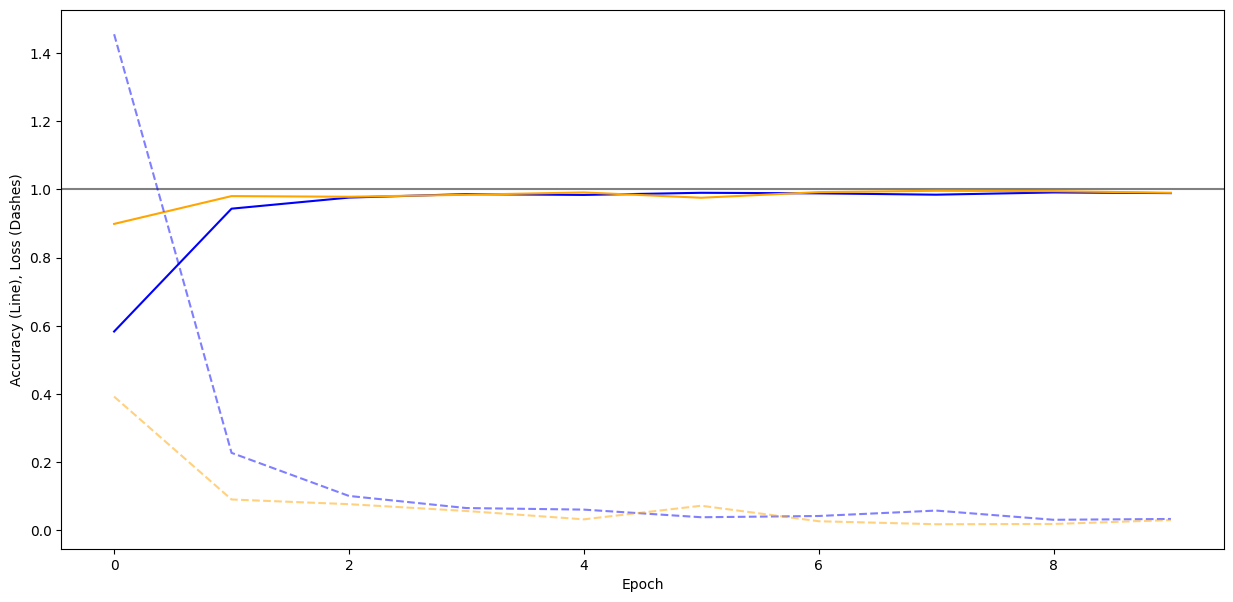

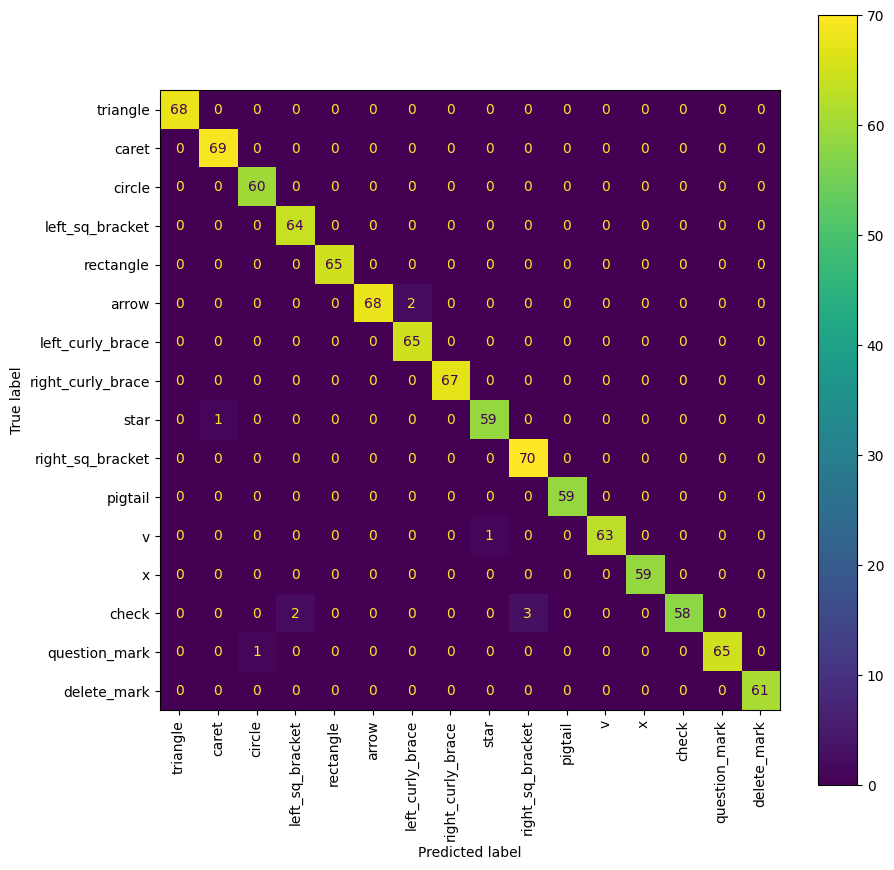

In [ ]:
model_1 = model_builder(64)
history_1 = train_model(model_1)
show_training_results(model_1,history_1)


# Lstm_Parameter 32

Epoch 1/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.2866 - loss: 2.3928 - val_accuracy: 0.7806 - val_loss: 0.9481 - learning_rate: 0.0010
Epoch 2/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8163 - loss: 0.7157 - val_accuracy: 0.9097 - val_loss: 0.3432 - learning_rate: 0.0010
Epoch 3/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9365 - loss: 0.2725 - val_accuracy: 0.9456 - val_loss: 0.2232 - learning_rate: 0.0010


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_22 (LSTM)                  │ (None, 32)             │         4,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 16)             │           528 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,194 (71.07 KB)

 Trainable params: 6,064 (23.69 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 12,130 (47.39 KB)

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


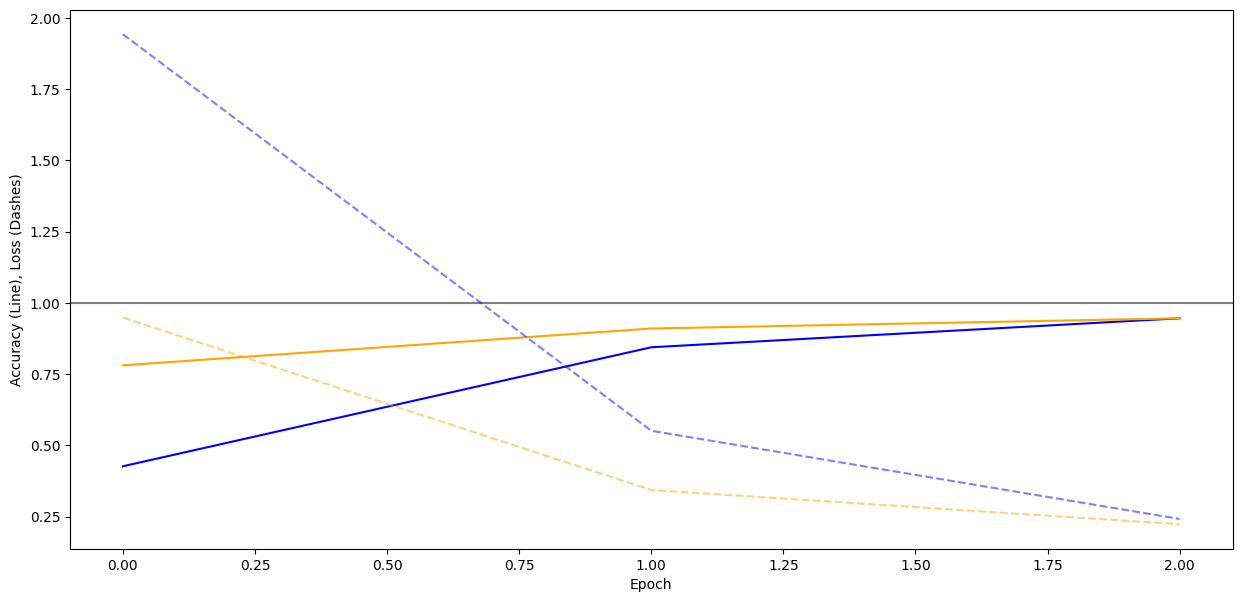

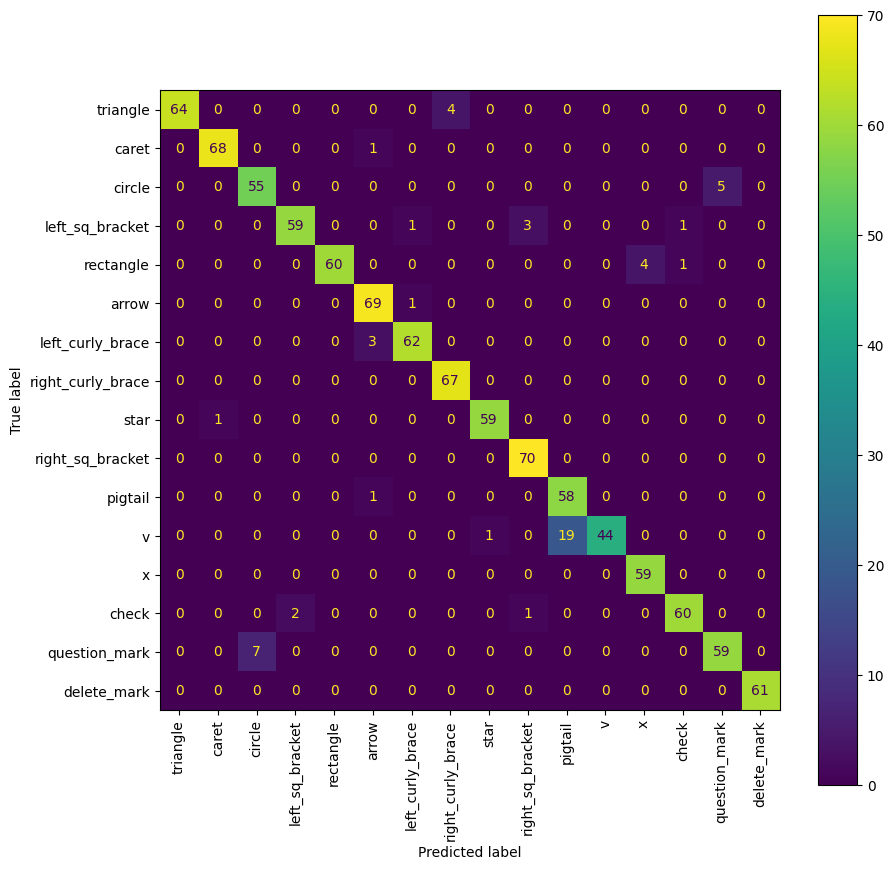

In [ ]:
model_2 = model_builder(32)
history_2 = train_model(model_2)
show_training_results(model_2,history_2)


# Lstm_Parameter 16

Epoch 1/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.2273 - loss: 2.5687 - val_accuracy: 0.5748 - val_loss: 1.6515 - learning_rate: 0.0010
Epoch 2/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6468 - loss: 1.3362 - val_accuracy: 0.7951 - val_loss: 0.6513 - learning_rate: 0.0010
Epoch 3/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8083 - loss: 0.5963 - val_accuracy: 0.8505 - val_loss: 0.4203 - learning_rate: 0.0010


Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_23 (LSTM)                  │ (None, 16)             │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 16)             │           528 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,866 (26.82 KB)

 Trainable params: 2,288 (8.94 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,578 (17.89 KB)

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


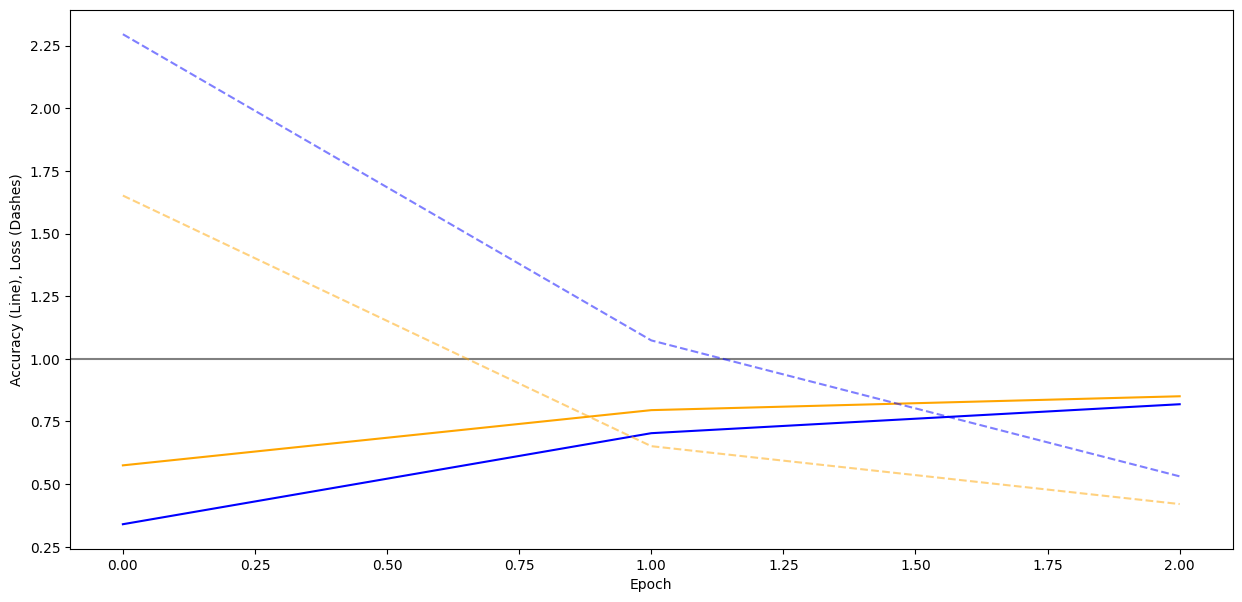

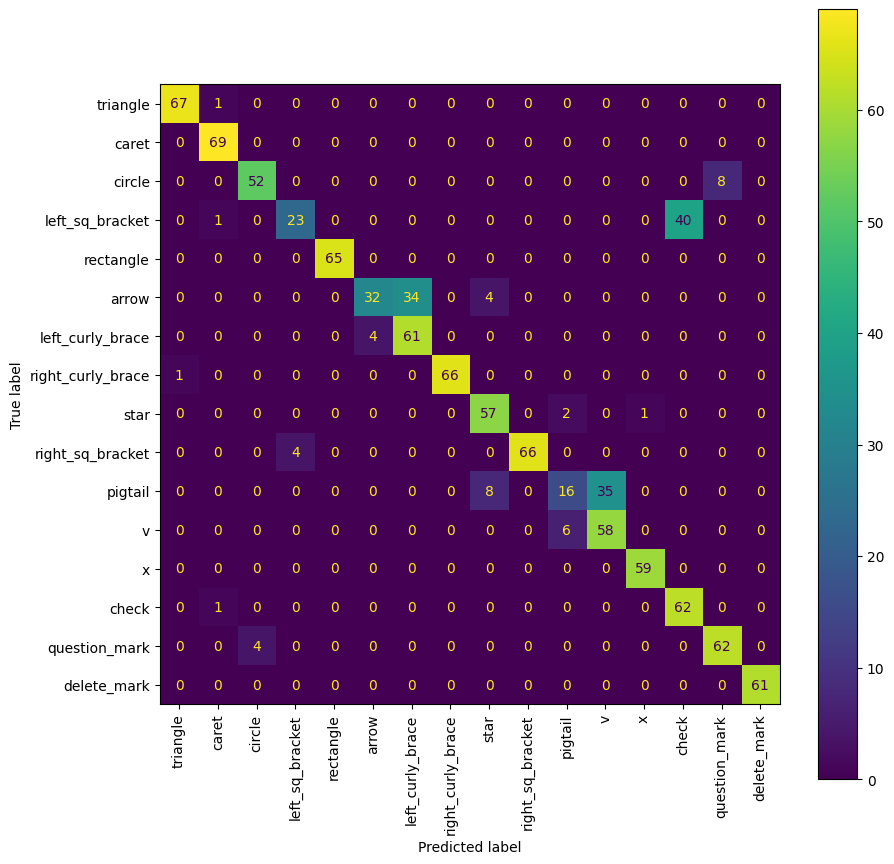

In [ ]:
model_3 = model_builder(16)
history_3 = train_model(model_3)
show_training_results(model_3,history_3)


# $1 gesture recognizer

In [ ]:
from recognizer import dolar_recognizer
from recognizer import Unistroke
from Point import Point
import Strokes

NumUnistrokes = 17   
Unistrokes = [None] * NumUnistrokes

Unistrokes[0] =   Unistroke("triangle",   [ Point(137,139),  Point(135,141),  Point(133,144),  Point(132,146),  Point(130,149),  Point(128,151),  Point(126,155),  Point(123,160),  Point(120,166),  Point(116,171),  Point(112,177),  Point(107,183),  Point(102,188),  Point(100,191),  Point(95,195),  Point(90,199),  Point(86,203),  Point(82,206),  Point(80,209),  Point(75,213),  Point(73,213),  Point(70,216),  Point(67,219),  Point(64,221),  Point(61,223),  Point(60,225),  Point(62,226),  Point(65,225),  Point(67,226),  Point(74,226),  Point(77,227),  Point(85,229),  Point(91,230),  Point(99,231),  Point(108,232),  Point(116,233),  Point(125,233),  Point(134,234),  Point(145,233),  Point(153,232),  Point(160,233),  Point(170,234),  Point(177,235),  Point(179,236),  Point(186,237),  Point(193,238),  Point(198,239),  Point(200,237),  Point(202,239),  Point(204,238),  Point(206,234),  Point(205,230),  Point(202,222),  Point(197,216),  Point(192,207),  Point(186,198),  Point(179,189),  Point(174,183),  Point(170,178),  Point(164,171),  Point(161,168),  Point(154,160),  Point(148,155),  Point(143,150),  Point(138,148),  Point(136,148)]);
Unistrokes[1] =   Unistroke("x",   [Point(87,142),  Point(89,145),  Point(91,148),  Point(93,151),  Point(96,155),  Point(98,157),  Point(100,160),  Point(102,162),  Point(106,167),  Point(108,169),  Point(110,171),  Point(115,177),  Point(119,183),  Point(123,189),  Point(127,193),  Point(129,196),  Point(133,200),  Point(137,206),  Point(140,209),  Point(143,212),  Point(146,215),  Point(151,220),  Point(153,222),  Point(155,223),  Point(157,225),  Point(158,223),  Point(157,218),  Point(155,211),  Point(154,208),  Point(152,200),  Point(150,189),  Point(148,179),  Point(147,170),  Point(147,158),  Point(147,148),  Point(147,141),  Point(147,136),  Point(144,135),  Point(142,137),  Point(140,139),  Point(135,145),  Point(131,152),  Point(124,163),  Point(116,177),  Point(108,191),  Point(100,206),  Point(94,217),  Point(91,222),  Point(89,225),  Point(87,226),  Point(87,224)]);
Unistrokes[2] =   Unistroke("rectangle",   [Point(78,149),  Point(78,153),  Point(78,157),  Point(78,160),  Point(79,162),  Point(79,164),  Point(79,167),  Point(79,169),  Point(79,173),  Point(79,178),  Point(79,183),  Point(80,189),  Point(80,193),  Point(80,198),  Point(80,202),  Point(81,208),  Point(81,210),  Point(81,216),  Point(82,222),  Point(82,224),  Point(82,227),  Point(83,229),  Point(83,231),  Point(85,230),  Point(88,232),  Point(90,233),  Point(92,232),  Point(94,233),  Point(99,232),  Point(102,233),  Point(106,233),  Point(109,234),  Point(117,235),  Point(123,236),  Point(126,236),  Point(135,237),  Point(142,238),  Point(145,238),  Point(152,238),  Point(154,239),  Point(165,238),  Point(174,237),  Point(179,236),  Point(186,235),  Point(191,235),  Point(195,233),  Point(197,233),  Point(200,233),  Point(201,235),  Point(201,233),  Point(199,231),  Point(198,226),  Point(198,220),  Point(196,207),  Point(195,195),  Point(195,181),  Point(195,173),  Point(195,163),  Point(194,155),  Point(192,145),  Point(192,143),  Point(192,138),  Point(191,135),  Point(191,133),  Point(191,130),  Point(190,128),  Point(188,129),  Point(186,129),  Point(181,132),  Point(173,131),  Point(162,131),  Point(151,132),  Point(149,132),  Point(138,132),  Point(136,132),  Point(122,131),  Point(120,131),  Point(109,130),  Point(107,130),  Point(90,132),  Point(81,133),  Point(76,133)]);
Unistrokes[3] =   Unistroke("circle",   [Point(127,141),  Point(124,140),  Point(120,139),  Point(118,139),  Point(116,139),  Point(111,140),  Point(109,141),  Point(104,144),  Point(100,147),  Point(96,152),  Point(93,157),  Point(90,163),  Point(87,169),  Point(85,175),  Point(83,181),  Point(82,190),  Point(82,195),  Point(83,200),  Point(84,205),  Point(88,213),  Point(91,216),  Point(96,219),  Point(103,222),  Point(108,224),  Point(111,224),  Point(120,224),  Point(133,223),  Point(142,222),  Point(152,218),  Point(160,214),  Point(167,210),  Point(173,204),  Point(178,198),  Point(179,196),  Point(182,188),  Point(182,177),  Point(178,167),  Point(170,150),  Point(163,138),  Point(152,130),  Point(143,129),  Point(140,131),  Point(129,136),  Point(126,139)]);
Unistrokes[4] =   Unistroke("check",   [Point(91,185),  Point(93,185),  Point(95,185),  Point(97,185),  Point(100,188),  Point(102,189),  Point(104,190),  Point(106,193),  Point(108,195),  Point(110,198),  Point(112,201),  Point(114,204),  Point(115,207),  Point(117,210),  Point(118,212),  Point(120,214),  Point(121,217),  Point(122,219),  Point(123,222),  Point(124,224),  Point(126,226),  Point(127,229),  Point(129,231),  Point(130,233),  Point(129,231),  Point(129,228),  Point(129,226),  Point(129,224),  Point(129,221),  Point(129,218),  Point(129,212),  Point(129,208),  Point(130,198),  Point(132,189),  Point(134,182),  Point(137,173),  Point(143,164),  Point(147,157),  Point(151,151),  Point(155,144),  Point(161,137),  Point(165,131),  Point(171,122),  Point(174,118),  Point(176,114),  Point(177,112),  Point(177,114),  Point(175,116),  Point(173,118)]);
Unistrokes[5] =   Unistroke("caret",   [Point(79,245),  Point(79,242),  Point(79,239),  Point(80,237),  Point(80,234),  Point(81,232),  Point(82,230),  Point(84,224),  Point(86,220),  Point(86,218),  Point(87,216),  Point(88,213),  Point(90,207),  Point(91,202),  Point(92,200),  Point(93,194),  Point(94,192),  Point(96,189),  Point(97,186),  Point(100,179),  Point(102,173),  Point(105,165),  Point(107,160),  Point(109,158),  Point(112,151),  Point(115,144),  Point(117,139),  Point(119,136),  Point(119,134),  Point(120,132),  Point(121,129),  Point(122,127),  Point(124,125),  Point(126,124),  Point(129,125),  Point(131,127),  Point(132,130),  Point(136,139),  Point(141,154),  Point(145,166),  Point(151,182),  Point(156,193),  Point(157,196),  Point(161,209),  Point(162,211),  Point(167,223),  Point(169,229),  Point(170,231),  Point(173,237),  Point(176,242),  Point(177,244),  Point(179,250),  Point(181,255),  Point(182,257)]);
Unistrokes[6] =   Unistroke("zig-zag",   [Point(307,216),  Point(333,186),  Point(356,215),  Point(375,186),  Point(399,216),  Point(418,186)])
Unistrokes[7] =   Unistroke("arrow",   [Point(68,222),  Point(70,220),  Point(73,218),  Point(75,217),  Point(77,215),  Point(80,213),  Point(82,212),  Point(84,210),  Point(87,209),  Point(89,208),  Point(92,206),  Point(95,204),  Point(101,201),  Point(106,198),  Point(112,194),  Point(118,191),  Point(124,187),  Point(127,186),  Point(132,183),  Point(138,181),  Point(141,180),  Point(146,178),  Point(154,173),  Point(159,171),  Point(161,170),  Point(166,167),  Point(168,167),  Point(171,166),  Point(174,164),  Point(177,162),  Point(180,160),  Point(182,158),  Point(183,156),  Point(181,154),  Point(178,153),  Point(171,153),  Point(164,153),  Point(160,153),  Point(150,154),  Point(147,155),  Point(141,157),  Point(137,158),  Point(135,158),  Point(137,158),  Point(140,157),  Point(143,156),  Point(151,154),  Point(160,152),  Point(170,149),  Point(179,147),  Point(185,145),  Point(192,144),  Point(196,144),  Point(198,144),  Point(200,144),  Point(201,147),  Point(199,149),  Point(194,157),  Point(191,160),  Point(186,167),  Point(180,176),  Point(177,179),  Point(171,187),  Point(169,189),  Point(165,194),  Point(164,196)]);
Unistrokes[8] =   Unistroke("left_sq_bracket",   [Point(140,124),  Point(138,123),  Point(135,122),  Point(133,123),  Point(130,123),  Point(128,124),  Point(125,125),  Point(122,124),  Point(120,124),  Point(118,124),  Point(116,125),  Point(113,125),  Point(111,125),  Point(108,124),  Point(106,125),  Point(104,125),  Point(102,124),  Point(100,123),  Point(98,123),  Point(95,124),  Point(93,123),  Point(90,124),  Point(88,124),  Point(85,125),  Point(83,126),  Point(81,127),  Point(81,129),  Point(82,131),  Point(82,134),  Point(83,138),  Point(84,141),  Point(84,144),  Point(85,148),  Point(85,151),  Point(86,156),  Point(86,160),  Point(86,164),  Point(86,168),  Point(87,171),  Point(87,175),  Point(87,179),  Point(87,182),  Point(87,186),  Point(88,188),  Point(88,195),  Point(88,198),  Point(88,201),  Point(88,207),  Point(89,211),  Point(89,213),  Point(89,217),  Point(89,222),  Point(88,225),  Point(88,229),  Point(88,231),  Point(88,233),  Point(88,235),  Point(89,237),  Point(89,240),  Point(89,242),  Point(91,241),  Point(94,241),  Point(96,240),  Point(98,239),  Point(105,240),  Point(109,240),  Point(113,239),  Point(116,240),  Point(121,239),  Point(130,240),  Point(136,237),  Point(139,237),  Point(144,238),  Point(151,237),  Point(157,236),  Point(159,237)]);
Unistrokes[9] =   Unistroke("right_sq_bracket",   [Point(112,138),  Point(112,136),  Point(115,136),  Point(118,137),  Point(120,136),  Point(123,136),  Point(125,136),  Point(128,136),  Point(131,136),  Point(134,135),  Point(137,135),  Point(140,134),  Point(143,133),  Point(145,132),  Point(147,132),  Point(149,132),  Point(152,132),  Point(153,134),  Point(154,137),  Point(155,141),  Point(156,144),  Point(157,152),  Point(158,161),  Point(160,170),  Point(162,182),  Point(164,192),  Point(166,200),  Point(167,209),  Point(168,214),  Point(168,216),  Point(169,221),  Point(169,223),  Point(169,228),  Point(169,231),  Point(166,233),  Point(164,234),  Point(161,235),  Point(155,236),  Point(147,235),  Point(140,233),  Point(131,233),  Point(124,233),  Point(117,235),  Point(114,238),  Point(112,238)]);
Unistrokes[10] =   Unistroke("v",   [Point(89,164),  Point(90,162),  Point(92,162),  Point(94,164),  Point(95,166),  Point(96,169),  Point(97,171),  Point(99,175),  Point(101,178),  Point(103,182),  Point(106,189),  Point(108,194),  Point(111,199),  Point(114,204),  Point(117,209),  Point(119,214),  Point(122,218),  Point(124,222),  Point(126,225),  Point(128,228),  Point(130,229),  Point(133,233),  Point(134,236),  Point(136,239),  Point(138,240),  Point(139,242),  Point(140,244),  Point(142,242),  Point(142,240),  Point(142,237),  Point(143,235),  Point(143,233),  Point(145,229),  Point(146,226),  Point(148,217),  Point(149,208),  Point(149,205),  Point(151,196),  Point(151,193),  Point(153,182),  Point(155,172),  Point(157,165),  Point(159,160),  Point(162,155),  Point(164,150),  Point(165,148),  Point(166,146)]);
Unistrokes[11] =   Unistroke("delete_mark",   [Point(123,129),  Point(123,131),  Point(124,133),  Point(125,136),  Point(127,140),  Point(129,142),  Point(133,148),  Point(137,154),  Point(143,158),  Point(145,161),  Point(148,164),  Point(153,170),  Point(158,176),  Point(160,178),  Point(164,183),  Point(168,188),  Point(171,191),  Point(175,196),  Point(178,200),  Point(180,202),  Point(181,205),  Point(184,208),  Point(186,210),  Point(187,213),  Point(188,215),  Point(186,212),  Point(183,211),  Point(177,208),  Point(169,206),  Point(162,205),  Point(154,207),  Point(145,209),  Point(137,210),  Point(129,214),  Point(122,217),  Point(118,218),  Point(111,221),  Point(109,222),  Point(110,219),  Point(112,217),  Point(118,209),  Point(120,207),  Point(128,196),  Point(135,187),  Point(138,183),  Point(148,167),  Point(157,153),  Point(163,145),  Point(165,142),  Point(172,133),  Point(177,127),  Point(179,127),  Point(180,125)]);
Unistrokes[12] =   Unistroke("left_curly_brace",   [Point(150,116),  Point(147,117),  Point(145,116),  Point(142,116),  Point(139,117),  Point(136,117),  Point(133,118),  Point(129,121),  Point(126,122),  Point(123,123),  Point(120,125),  Point(118,127),  Point(115,128),  Point(113,129),  Point(112,131),  Point(113,134),  Point(115,134),  Point(117,135),  Point(120,135),  Point(123,137),  Point(126,138),  Point(129,140),  Point(135,143),  Point(137,144),  Point(139,147),  Point(141,149),  Point(140,152),  Point(139,155),  Point(134,159),  Point(131,161),  Point(124,166),  Point(121,166),  Point(117,166),  Point(114,167),  Point(112,166),  Point(114,164),  Point(116,163),  Point(118,163),  Point(120,162),  Point(122,163),  Point(125,164),  Point(127,165),  Point(129,166),  Point(130,168),  Point(129,171),  Point(127,175),  Point(125,179),  Point(123,184),  Point(121,190),  Point(120,194),  Point(119,199),  Point(120,202),  Point(123,207),  Point(127,211),  Point(133,215),  Point(142,219),  Point(148,220),  Point(151,221)]);
Unistrokes[13] =   Unistroke("right_curly_brace",   [Point(117,132),  Point(115,132),  Point(115,129),  Point(117,129),  Point(119,128),  Point(122,127),  Point(125,127),  Point(127,127),  Point(130,127),  Point(133,129),  Point(136,129),  Point(138,130),  Point(140,131),  Point(143,134),  Point(144,136),  Point(145,139),  Point(145,142),  Point(145,145),  Point(145,147),  Point(145,149),  Point(144,152),  Point(142,157),  Point(141,160),  Point(139,163),  Point(137,166),  Point(135,167),  Point(133,169),  Point(131,172),  Point(128,173),  Point(126,176),  Point(125,178),  Point(125,180),  Point(125,182),  Point(126,184),  Point(128,187),  Point(130,187),  Point(132,188),  Point(135,189),  Point(140,189),  Point(145,189),  Point(150,187),  Point(155,186),  Point(157,185),  Point(159,184),  Point(156,185),  Point(154,185),  Point(149,185),  Point(145,187),  Point(141,188),  Point(136,191),  Point(134,191),  Point(131,192),  Point(129,193),  Point(129,195),  Point(129,197),  Point(131,200),  Point(133,202),  Point(136,206),  Point(139,211),  Point(142,215),  Point(145,220),  Point(147,225),  Point(148,231),  Point(147,239),  Point(144,244),  Point(139,248),  Point(134,250),  Point(126,253),  Point(119,253),  Point(115,253)]);
Unistrokes[14] =   Unistroke("star",   [Point(75,250),  Point(75,247),  Point(77,244),  Point(78,242),  Point(79,239),  Point(80,237),  Point(82,234),  Point(82,232),  Point(84,229),  Point(85,225),  Point(87,222),  Point(88,219),  Point(89,216),  Point(91,212),  Point(92,208),  Point(94,204),  Point(95,201),  Point(96,196),  Point(97,194),  Point(98,191),  Point(100,185),  Point(102,178),  Point(104,173),  Point(104,171),  Point(105,164),  Point(106,158),  Point(107,156),  Point(107,152),  Point(108,145),  Point(109,141),  Point(110,139),  Point(112,133),  Point(113,131),  Point(116,127),  Point(117,125),  Point(119,122),  Point(121,121),  Point(123,120),  Point(125,122),  Point(125,125),  Point(127,130),  Point(128,133),  Point(131,143),  Point(136,153),  Point(140,163),  Point(144,172),  Point(145,175),  Point(151,189),  Point(156,201),  Point(161,213),  Point(166,225),  Point(169,233),  Point(171,236),  Point(174,243),  Point(177,247),  Point(178,249),  Point(179,251),  Point(180,253),  Point(180,255),  Point(179,257),  Point(177,257),  Point(174,255),  Point(169,250),  Point(164,247),  Point(160,245),  Point(149,238),  Point(138,230),  Point(127,221),  Point(124,220),  Point(112,212),  Point(110,210),  Point(96,201),  Point(84,195),  Point(74,190),  Point(64,182),  Point(55,175),  Point(51,172),  Point(49,170),  Point(51,169),  Point(56,169),  Point(66,169),  Point(78,168),  Point(92,166),  Point(107,164),  Point(123,161),  Point(140,162),  Point(156,162),  Point(171,160),  Point(173,160),  Point(186,160),  Point(195,160),  Point(198,161),  Point(203,163),  Point(208,163),  Point(206,164),  Point(200,167),  Point(187,172),  Point(174,179),  Point(172,181),  Point(153,192),  Point(137,201),  Point(123,211),  Point(112,220),  Point(99,229),  Point(90,237),  Point(80,244),  Point(73,250),  Point(69,254),  Point(69,252)]);
Unistrokes[15] =   Unistroke("pigtail",   [Point(81,219),  Point(84,218),  Point(86,220),  Point(88,220),  Point(90,220),  Point(92,219),  Point(95,220),  Point(97,219),  Point(99,220),  Point(102,218),  Point(105,217),  Point(107,216),  Point(110,216),  Point(113,214),  Point(116,212),  Point(118,210),  Point(121,208),  Point(124,205),  Point(126,202),  Point(129,199),  Point(132,196),  Point(136,191),  Point(139,187),  Point(142,182),  Point(144,179),  Point(146,174),  Point(148,170),  Point(149,168),  Point(151,162),  Point(152,160),  Point(152,157),  Point(152,155),  Point(152,151),  Point(152,149),  Point(152,146),  Point(149,142),  Point(148,139),  Point(145,137),  Point(141,135),  Point(139,135),  Point(134,136),  Point(130,140),  Point(128,142),  Point(126,145),  Point(122,150),  Point(119,158),  Point(117,163),  Point(115,170),  Point(114,175),  Point(117,184),  Point(120,190),  Point(125,199),  Point(129,203),  Point(133,208),  Point(138,213),  Point(145,215),  Point(155,218),  Point(164,219),  Point(166,219),  Point(177,219),  Point(182,218),  Point(192,216),  Point(196,213),  Point(199,212),  Point(201,211)]);
Unistrokes[16] = Unistroke("question_mark",   [Point(105,132),Point(103,131),Point(103,129),Point(103,127),Point(105,126),Point(107,125),Point(109,124),Point(112,123),Point(114,123),Point(117,122),Point(120,121),Point(122,122),Point(125,121),Point(127,121),Point(129,122),Point(131,122),Point(133,122),Point(135,123),Point(138,123),Point(140,124),Point(142,125),Point(145,126),Point(147,127),Point(150,128),Point(152,131),Point(153,133),Point(154,135),Point(155,138),Point(156,141),Point(157,144),Point(157,147),Point(158,149),Point(158,151),Point(158,153),Point(158,156),Point(158,158),Point(158,161),Point(157,164),Point(157,166),Point(155,169),Point(152,170),Point(150,171),Point(148,172),Point(146,172),Point(144,172),Point(142,171),Point(140,171),Point(138,171),Point(136,172),Point(134,171),Point(131,172),Point(129,173),Point(127,173),Point(125,175),Point(123,174),Point(121,175),Point(120,178),Point(118,179),Point(118,181),Point(116,184),Point(116,186),Point(115,190),Point(115,192),Point(115,197),Point(116,199),Point(116,201),Point(116,204),Point(117,207),Point(117,209),Point(117,212),Point(118,217),Point(119,221),Point(119,223),Point(119,225),Point(119,228),Point(120,230),Point(121,235)])


print(type(Unistrokes))
s = Strokes.Unistrokes

#strokes_s = s.getStrokes()
#if Unistrokes == strokes_s:
#    print("why")
#else:
#    print("f")
    
    #for p in Unistrokes[6].Points:
    #    print(p.X)
        
    
    #print("____next____")
    #for p in strokes_s[6].Points:
    #    print(p.X)
    #for i, (u, s) in enumerate(zip(Unistrokes, strokes_s)):
    #    if u != s:
    #        print(f"Difference at index {i}:")
    #        print(f"Unistroke: {u}")
    #        print(f"Stroke: {s}")

#
#Unistrokes_2 = [None] * len(strokes_s)
#for i in range(len(strokes_s)):
#    Unistrokes_2[i] =  Unistroke(strokes_s[i].Name,strokes_s[i].Points)


#for i in range(len(Unistrokes_2)):
    
#    for p in range(len(Unistrokes_2[i].Points)):        
#        if Unistrokes_2[i].Points[p].X != Unistrokes[i].Points[p].X or Unistrokes_2[i].Points[p].Y != Unistrokes[i].Points[p].Y:
#            print("what?")
#            print(str(Unistrokes_2[i].Points[p].X) + " "+ str(Unistrokes[i].Points[p].X) +" "+ str(Unistrokes_2[i].Points[p].Y) +" "+str(Unistrokes[i].Points[p].Y) )
#            print(str(i) +" "+ str(p))
#            




dr = dolar_recognizer(s)



def evaluate_recognizer():
    print(val_X[0])
    print(val_X[0][0])
    print(val_X[0][0][0])
    points = [] 
    names = []
    score = []
    time = []
    accuracy = 0
    label_list = []
    #convert array to points
    for v in range(len(val_X)):
        points.clear()
        for p in val_X[v]:
            points.append(Point(p[0],p[1]))
        result = dr.Recognize(points,True)
        print(result.Name)
        names.append(result.Name)
        score.append(result.Score)
        time.append(result.Time)
        if( val_labels[v] == result.Name):
            accuracy +=1
            
    accuracy = accuracy/(len(val_X))  
    time_mean = np.mean(time)
    time_sum = np.sum(time)      
    print("---")
    print(str(accuracy))
        
    #one is numbers the other is str.
    # I know it works with the numbers.
        
    
    print("_______________-------_________________")
    #for v in range(1):      #len(val_X)):
    #    for p in val_X[v]:
    #        points.append(Point(p[0],p[1]))
    #    result = dr.Recognize(points,False)
    #    names.append(result.Name)
    #    score.append(result.Score)
    #    time.append(result.Time)
        
    #pass
    #print("what?")
    #print(val_labels)
    #print(set(val_labels))
    #print(len(set(val_labels)))
    print(names)
    #print(set(names))
    print(len(set(names)))
    # create and plot confusion matrix
    val_y_labels = np.argmax(val_y, axis=1)
    # Step 1: Identify all unique labels
    all_labels = sorted(list(set(val_labels).union(set(names))))

    # Step 2: Ensure confusion matrix covers all labels
    conf_matrix = confusion_matrix(val_labels, names)

    # Step 3: Display the confusion matrix
    fig, ax = plt.subplots(figsize=(10, 10))
    ConfusionMatrixDisplay(conf_matrix, display_labels=all_labels).plot(ax=ax)
    plt.xticks(rotation=90, ha='center')
    plt.show()
    
    print("accuracy")
    print(accuracy)
    return accuracy, time_mean, time_sum


<class 'list'>


# Evaluating the Models

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
[[9.9761558e-01 3.5820913e-04 4.4924007e-05 ... 5.6259415e-07
  3.9741894e-07 6.7075898e-06]
 [9.9737275e-01 5.7052955e-04 3.4695964e-05 ... 6.5375679e-07
  3.6405859e-07 6.8316763e-06]
 [9.9685174e-01 4.9861334e-04 3.4847850e-05 ... 5.5496213e-07
  3.7767251e-07 6.1425694e-06]
 ...
 [3.2981853e-03 2.2170216e-05 5.0647850e-05 ... 8.6943974e-04
  7.1627110e-05 9.0709710e-01]
 [5.5473251e-03 9.3196009e-05 5.2507108e-05 ... 3.9613855e-04
  6.2758406e-04 2.6290605e-03]
 [1.1432018e-03 7.5039743e-06 1.5763717e-05 ... 3.9141296e-04
  1.9273446e-05 9.7708535e-01]]
val:val_y_labels
[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 

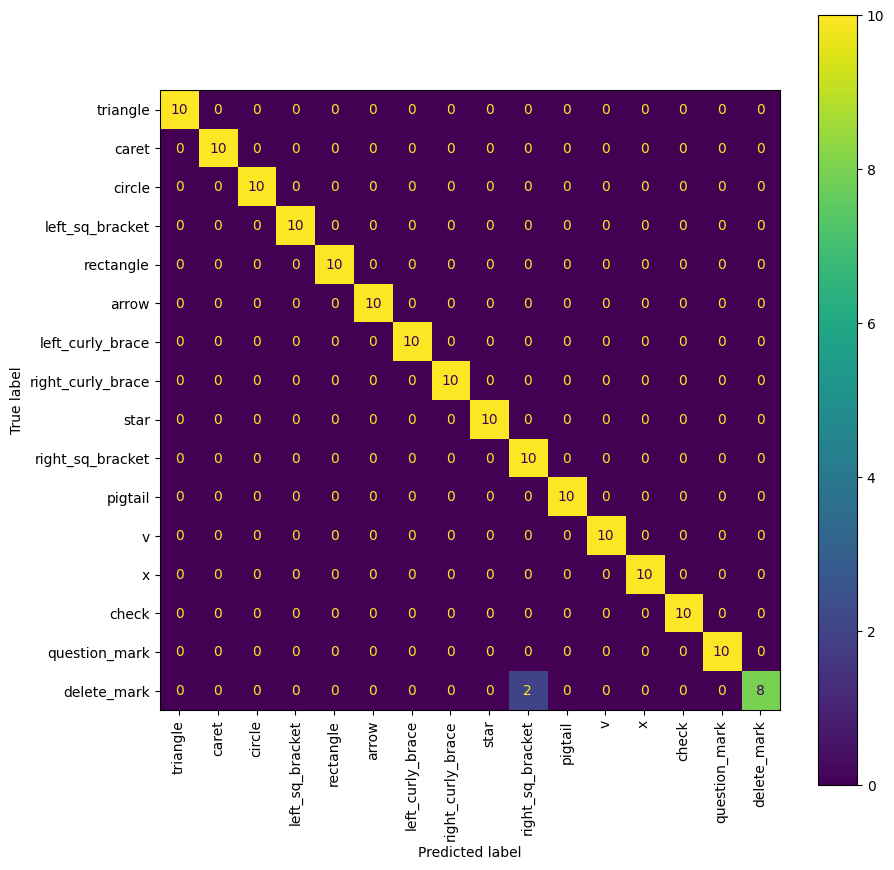

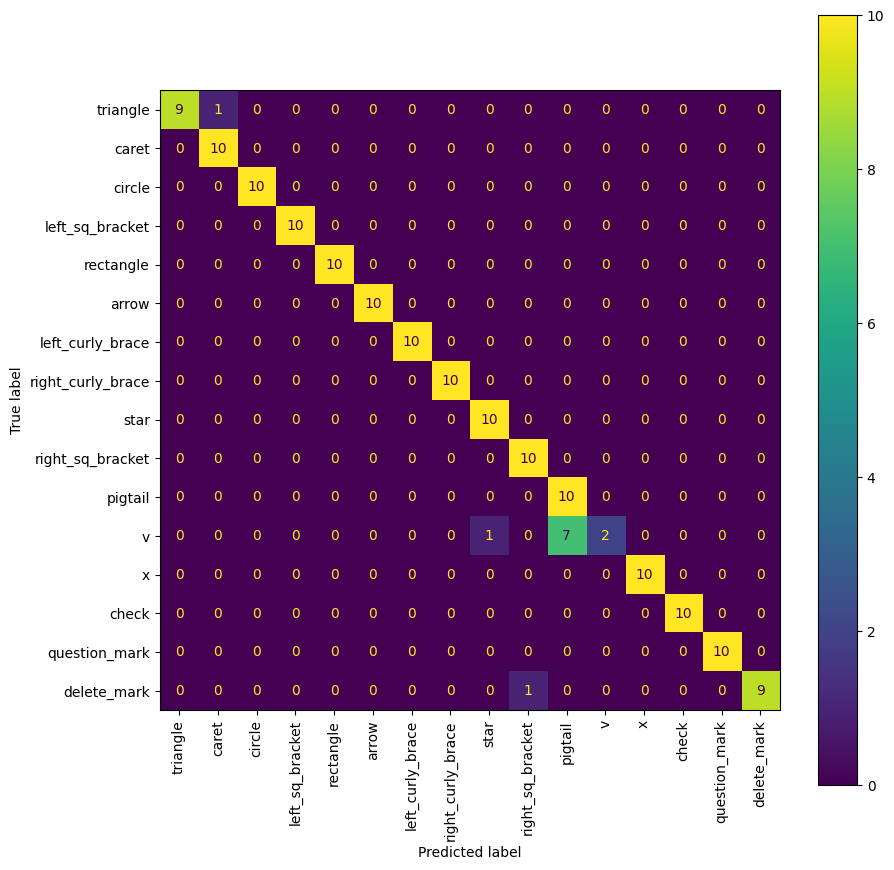

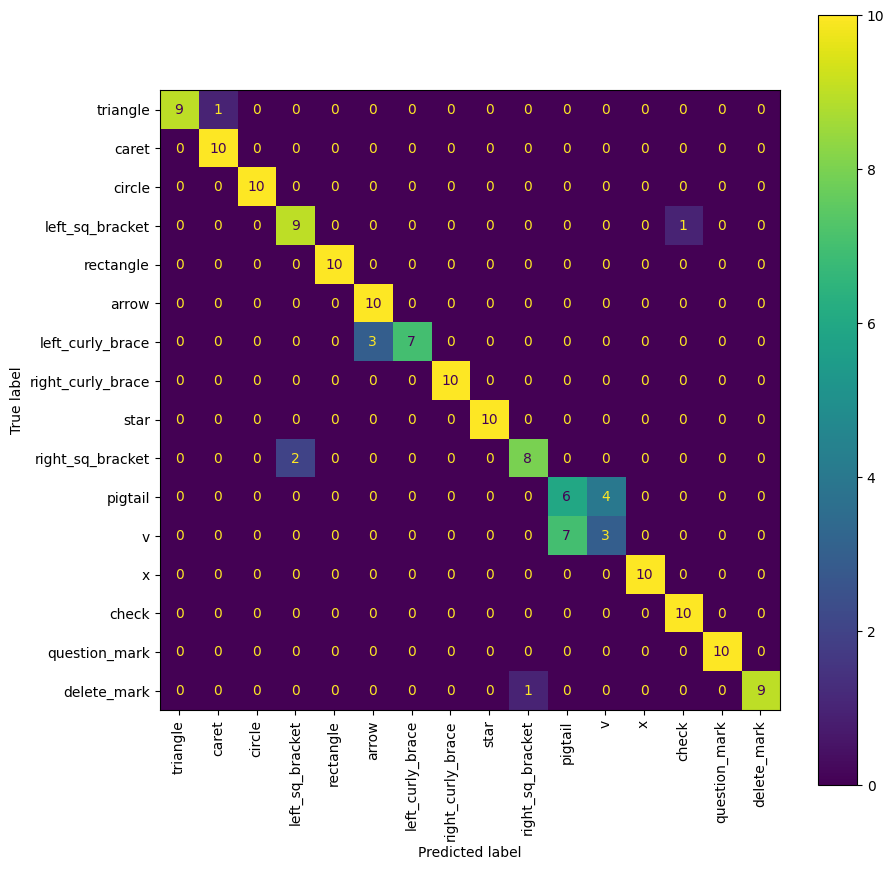

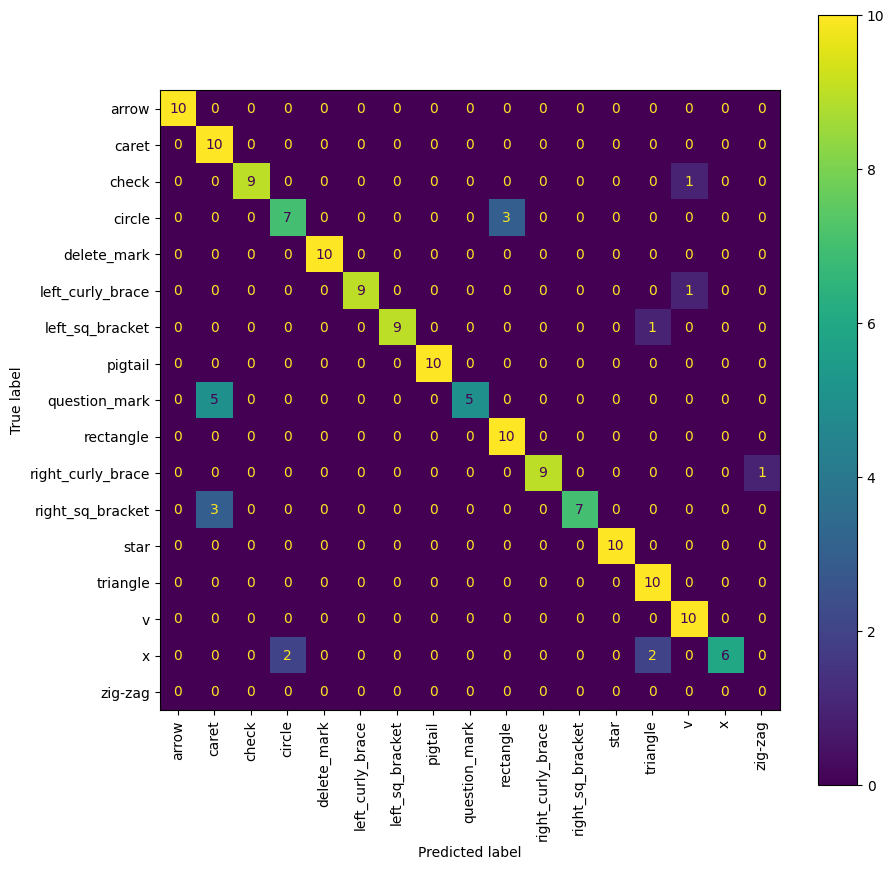

accuracy
0.88125
loss:0.05503111332654953 accuracy:0.987500011920929
loss:0.2413417547941208 accuracy:0.9375
loss:0.43046846985816956 accuracy:0.8812500238418579


In [ ]:
val_loss_1, val_accuracy_1, time_mean_1, time_sum_1 = evaluate_model(model_1)
val_loss_2, val_accuracy_2, time_mean_2, time_sum_2 = evaluate_model(model_2)
val_loss_3, val_accuracy_3, time_mean_3, time_sum_3 = evaluate_model(model_3)
val_accuracy_dolar, time_mean_dolar, time_sum_dolar = evaluate_recognizer()

print("loss:"+str(val_loss_1)+" accuracy:"+str(val_accuracy_1))
print("loss:"+str(val_loss_2)+" accuracy:"+str(val_accuracy_2))
print("loss:"+str(val_loss_3)+" accuracy:"+str(val_accuracy_3))



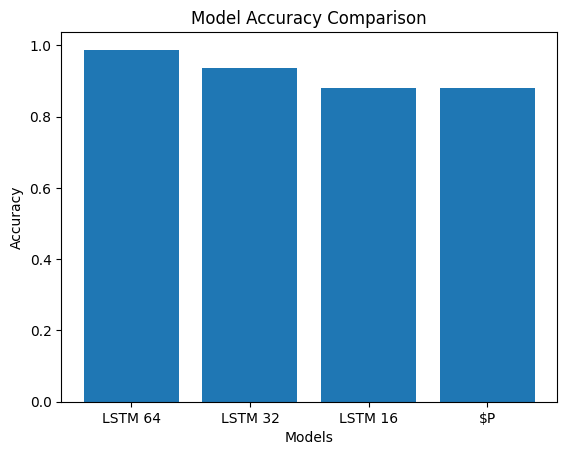

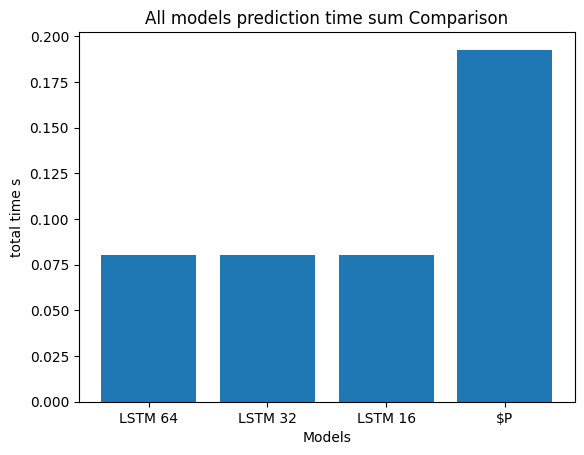

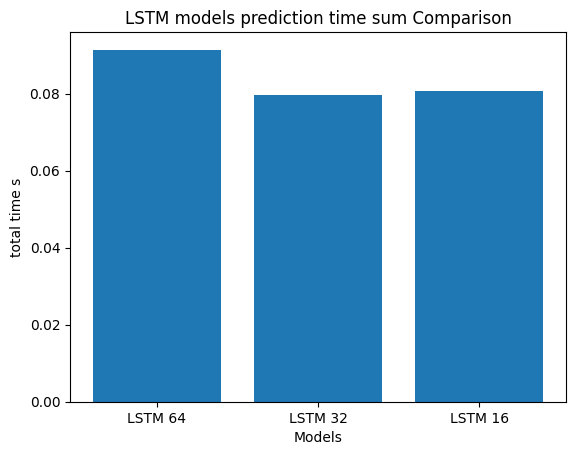

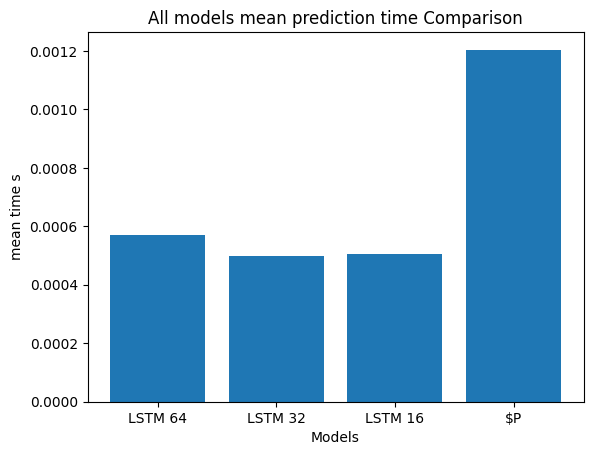

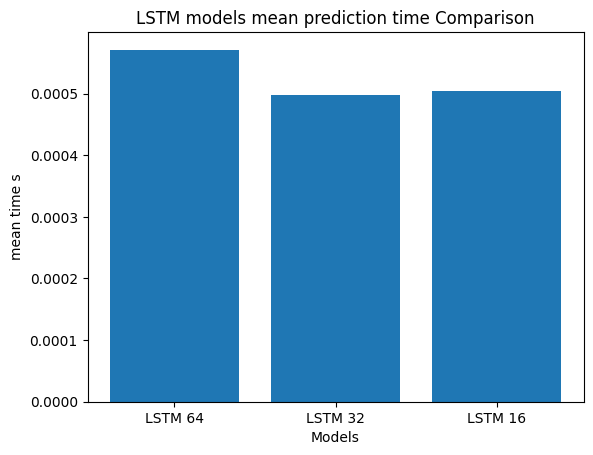

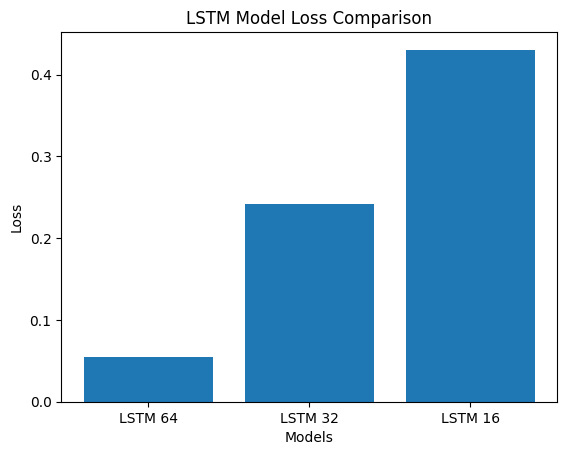

In [ ]:
values= [val_accuracy_1,val_accuracy_2,val_accuracy_3,val_accuracy_dolar]
positions = range(len(values))
labels = ['LSTM 64', 'LSTM 32', 'LSTM 16', '$P']
plt.bar(positions, values, tick_label=labels)
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

#print(type(time_mean_1))
#print(time_mean_1)

time_mean_dolar = time_mean_dolar.total_seconds()
time_sum_dolar = time_sum_dolar.total_seconds()
#print(type(time_mean_dolar))
#print(time_mean_dolar)


values= [time_sum_3,time_sum_3,time_sum_3,time_sum_dolar]
positions = range(len(values))
labels = ['LSTM 64', 'LSTM 32', 'LSTM 16', '$P']
plt.bar(positions, values, tick_label=labels)
plt.title('All models prediction time sum Comparison')
plt.xlabel('Models')
plt.ylabel('total time s')
plt.show()


values= [time_sum_1,time_sum_2,time_sum_3]
positions = range(len(values))
labels = ['LSTM 64', 'LSTM 32', 'LSTM 16']
plt.bar(positions, values, tick_label=labels)
plt.title('LSTM models prediction time sum Comparison')
plt.xlabel('Models')
plt.ylabel('total time s')
plt.show()

values= [time_mean_1,time_mean_2,time_mean_3,time_mean_dolar]
positions = range(len(values))
labels = ['LSTM 64', 'LSTM 32', 'LSTM 16', '$P']
plt.bar(positions, values, tick_label=labels)
plt.title('All models mean prediction time Comparison')
plt.xlabel('Models')
plt.ylabel('mean time s')
plt.show()

values= [time_mean_1,time_mean_2,time_mean_3]
positions = range(len(values))
labels = ['LSTM 64', 'LSTM 32', 'LSTM 16']
plt.bar(positions, values, tick_label=labels)
plt.title('LSTM models mean prediction time Comparison')
plt.xlabel('Models')
plt.ylabel('mean time s')
plt.show()

values= [val_loss_1,val_loss_2,val_loss_3]
positions = range(len(values))
labels = ['LSTM 64', 'LSTM 32', 'LSTM 16']
plt.bar(positions, values, tick_label=labels)
plt.title('LSTM Model Loss Comparison')
plt.xlabel('Models')
plt.ylabel('Loss')
plt.show()




In [ ]:
from tensorflow import keras

#model_2.save('LSTM_32_model.h5')
model_2.save('LSTM_32_model.keras')
#keras.saving.save_model(model_2, 'LSTM_32_model.keras')

AttributeError: module 'keras._tf_keras.keras' has no attribute 'saving'

# Report
The confusion matrix shows, that the  model with 64 LSTM Parameters only misgudged 3 predictions.
The one with 32 LSTM parameters misjudged 8 predictions
The one with 16 LSTM parameters misjudged 15 predictions.
The $P Prediction misjudged 25 predictions. 10 of these where however, becouse the Model misjudged all Questionmark guestures.

